In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('crime_csv_all_years.csv')
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Theft from Vehicle,2003,6,2,16.0,30.0,8XX RICHARDS ST,Central Business District,491347.04,5458514.73
1,Theft of Vehicle,2003,9,12,23.0,0.0,10XX E 54TH AVE,Sunset,493799.39,5451973.70
2,Other Theft,2003,6,29,15.0,45.0,65XX FRASER ST,Sunset,493394.25,5452440.64
3,Theft from Vehicle,2003,8,27,18.0,0.0,8XX BURRARD ST,Central Business District,491066.19,5458945.81
4,Break and Enter Residential/Other,2003,11,13,13.0,36.0,22XX E PENDER ST,Grandview-Woodland,495705.71,5458615.07


In [2]:
df_sample = df[0:200]
df_sample

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Theft from Vehicle,2003,6,2,16.0,30.0,8XX RICHARDS ST,Central Business District,491347.04,5458514.73
1,Theft of Vehicle,2003,9,12,23.0,0.0,10XX E 54TH AVE,Sunset,493799.39,5451973.70
2,Other Theft,2003,6,29,15.0,45.0,65XX FRASER ST,Sunset,493394.25,5452440.64
3,Theft from Vehicle,2003,8,27,18.0,0.0,8XX BURRARD ST,Central Business District,491066.19,5458945.81
4,Break and Enter Residential/Other,2003,11,13,13.0,36.0,22XX E PENDER ST,Grandview-Woodland,495705.71,5458615.07
5,Other Theft,2003,6,25,20.0,35.0,11XX ROBSON ST,West End,490853.26,5459162.22
6,Mischief,2003,12,13,23.0,0.0,1XX W PENDER ST,Central Business District,492171.05,5458703.31
7,Theft from Vehicle,2003,10,20,19.0,0.0,31XX PRINCE EDWARD ST,Mount Pleasant,492986.83,5456074.32
8,Other Theft,2003,8,21,22.0,0.0,65XX FRASER ST,Sunset,493394.25,5452440.64
9,Break and Enter Residential/Other,2003,3,7,12.0,0.0,19XX ADANAC ST,Grandview-Woodland,495280.89,5458304.04


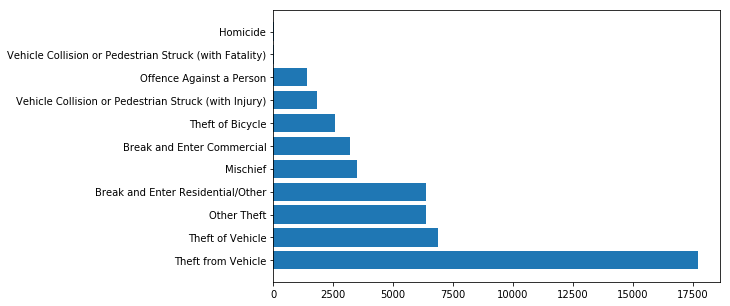

In [3]:
plt.figure(figsize=(8,5))
plt.barh(df.TYPE.unique(), df[df['YEAR']==2003]['TYPE'].value_counts())
plt.show()

In [4]:
types = df.TYPE.unique()
df_types = pd.DataFrame(types)
df_types.columns = ['type']

years = df.YEAR.unique()
# remove last year since it's incomplete
years = np.delete(years, len(years)-1)

counts = []
for year in years:
    c = df[df['YEAR']==year]['TYPE'].value_counts()
    df_types[str(year)] = c.values

df_types

,type,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Theft from Vehicle,17744,18204,16554,14734,12226,11298,10007,8612,7435,8097,8341,10139,10545,12815,12959,14987
1,Theft of Vehicle,6883,6538,5542,5674,4996,5276,4429,4506,4828,4243,4191,4518,4679,5701,5509,5737
2,Other Theft,6391,6102,5062,5184,4810,4432,3890,3755,3881,3781,3674,4210,4191,4599,5393,4943
3,Break and Enter Residential/Other,6361,5601,5031,4328,4411,4221,3662,3432,3562,3630,3488,3150,3227,3184,3238,3111
4,Mischief,3506,3801,3771,3682,3305,3142,3497,3270,3231,3311,3025,3044,3120,2996,2468,2398
5,Break and Enter Commercial,3197,3283,2639,2966,3024,2420,1882,1668,1749,1817,2034,2461,3064,2685,2198,2143
6,Theft of Bicycle,2582,2605,2611,2844,2436,2224,1858,1657,1517,1687,1774,2244,2457,2637,2194,2022
7,Vehicle Collision or Pedestrian Struck (with I...,1803,1868,1984,1467,1237,1185,1641,1467,1262,1474,1486,1576,1670,1706,1519,1473
8,Offence Against a Person,1418,1230,1416,1384,1203,1176,1278,1327,1094,1151,1034,1292,1372,1480,1499,1149
9,Vehicle Collision or Pedestrian Struck (with F...,24,22,32,20,24,18,18,10,15,18,15,13,15,15,17,15


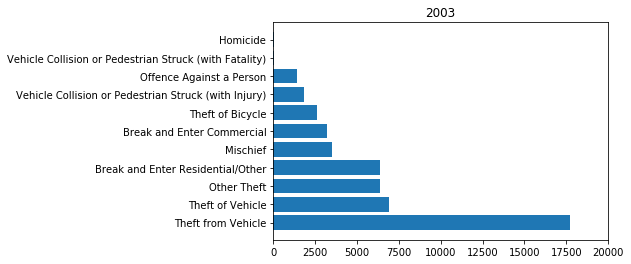

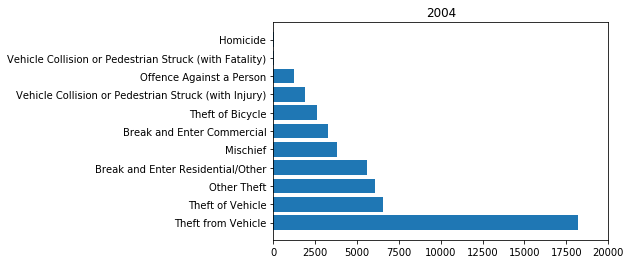

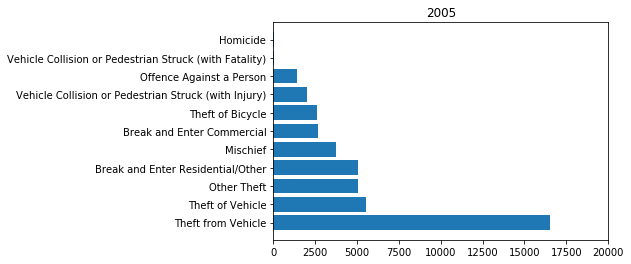

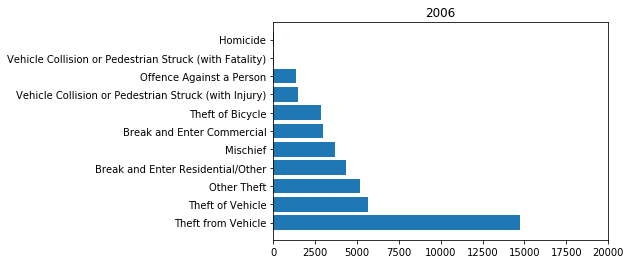

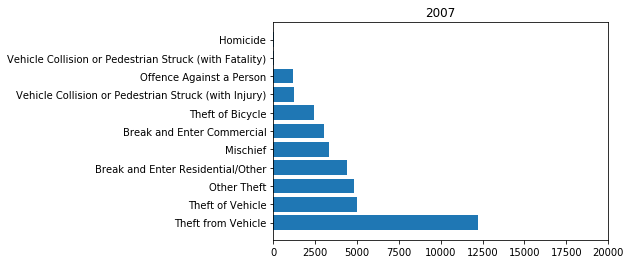

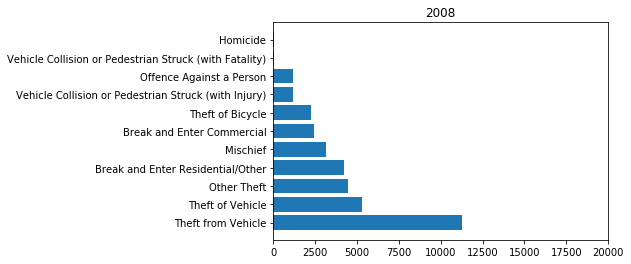

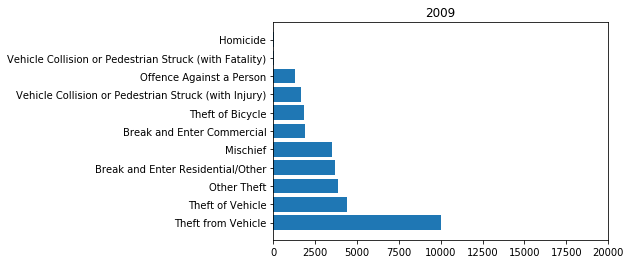

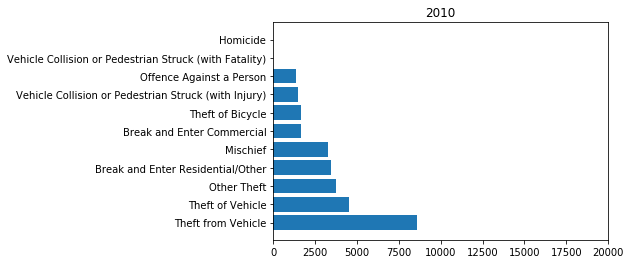

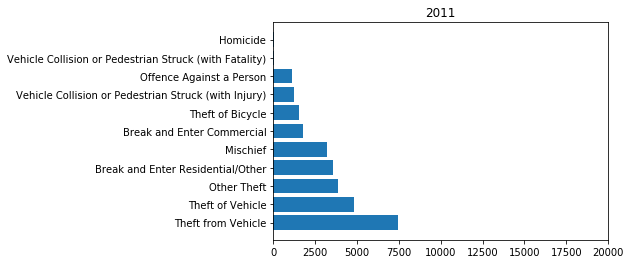

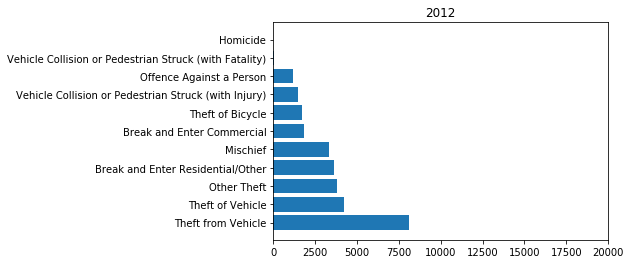

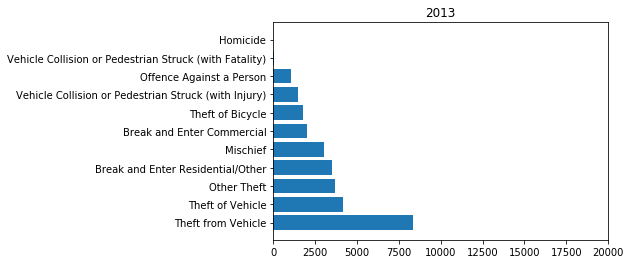

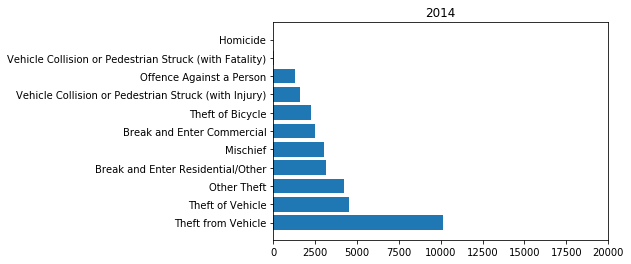

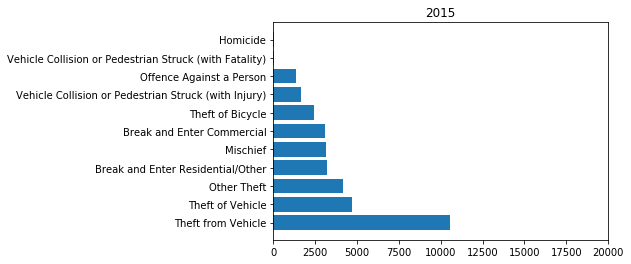

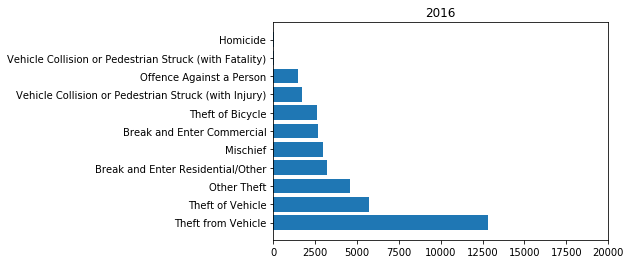

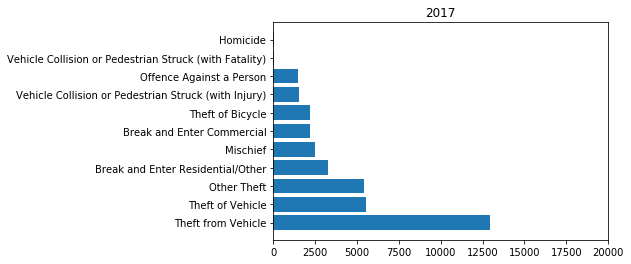

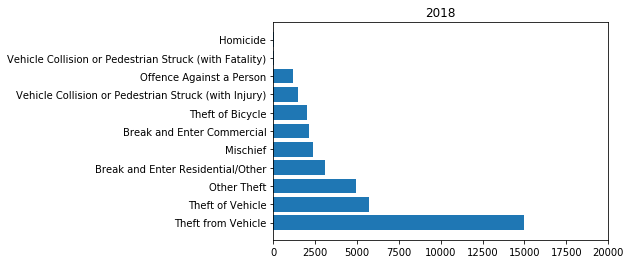

In [5]:
## fig = plt.figure(figsize=(16, 15))

for year in years:
    plt.barh(df_types['type'], df_types[str(year)])
    plt.title(str(year))
    plt.xlim(0, 20000)
    plt.show()

<IPython.core.display.Javascript object>


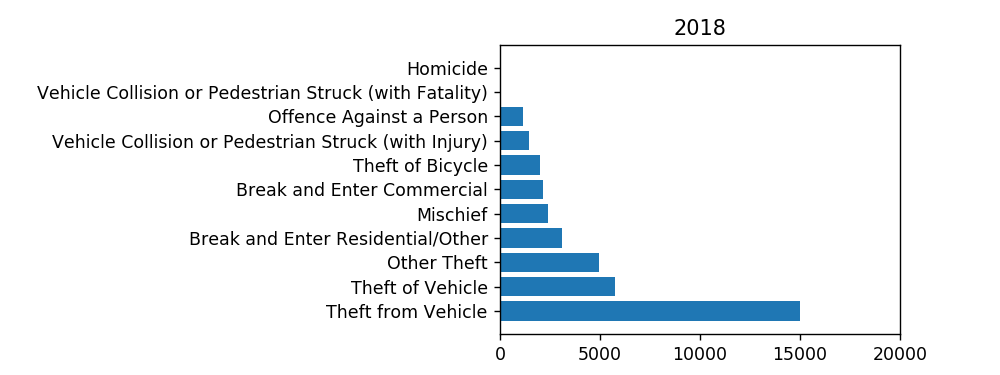

In [12]:
import matplotlib.pyplot as plt
from matplotlib import animation
import time
%matplotlib notebook

def barlist(n): 
    if n == 1:
        time.sleep(2)
    return df_types[str(2002 + n)].values.tolist()
 
fig, ax = plt.subplots(1,1,figsize=(8, 3))
plt.subplots_adjust(left=0.5)

n=16 #Number of frames
x=range(1,6)
barcollection = ax.barh(df_types['type'], barlist(1))
plt.xlim(0, 20000)

def animate(i):
    y=barlist(i+1)
    plt.title(str(2003+i))
    for i, b in enumerate(barcollection):
        b.set_width(y[i])

anim=animation.FuncAnimation(fig,animate,repeat=True,blit=False,frames=n,
                             interval=500)

plt.show()

In [ ]:
#from matplotlib import style
#style.use('fivethirtyeight')